In [1]:
import cv2;
import matplotlib.pyplot;
import numpy;


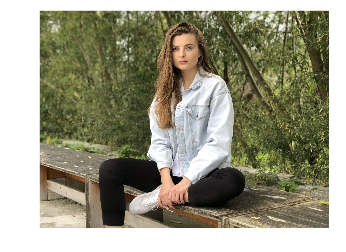

In [2]:
example = cv2.imread('portrait.jpg');
matplotlib.pyplot.imshow(cv2.cvtColor(example, cv2.COLOR_BGR2RGB));
matplotlib.pyplot.show();


In [3]:
mask = numpy.zeros(example.shape[:2], numpy.uint8);
bgdModel = numpy.zeros((1,65),numpy.float64);
fgdModel = numpy.zeros((1,65),numpy.float64);


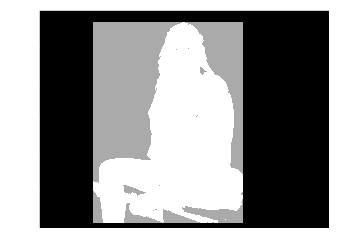

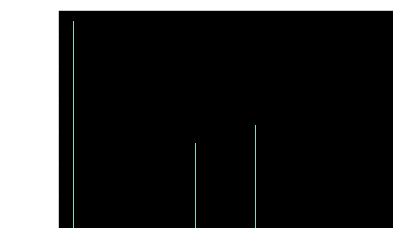

In [4]:
seg = cv2.grabCut(example, mask, (751, 168, 2836 - 751, 2948 - 168), bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT);
matplotlib.pyplot.imshow(mask * (255 / 3), cmap='gray');
matplotlib.pyplot.show();
matplotlib.pyplot.hist(mask.ravel(), bins=256, range=[0, 5]);
matplotlib.pyplot.show();


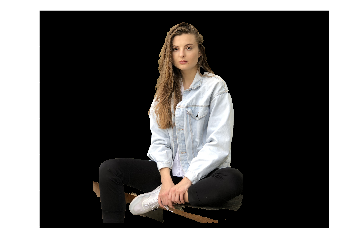

In [5]:
foregroundMask = mask == 3;
foreground = example * foregroundMask[:, :, numpy.newaxis];
matplotlib.pyplot.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB));
matplotlib.pyplot.show();


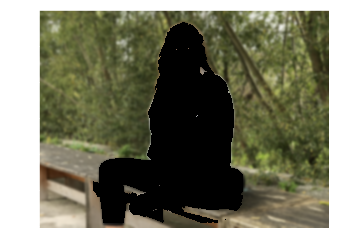

In [6]:
backgroundMask = (mask == 0) + (mask == 2);
background = cv2.GaussianBlur(example, (101, 101), 0);
background = background * backgroundMask[:, :, numpy.newaxis];
matplotlib.pyplot.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB));
matplotlib.pyplot.show();


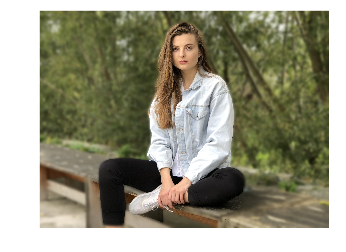

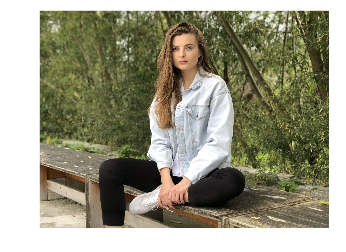

In [7]:
newExample = foreground + background;
matplotlib.pyplot.imshow(cv2.cvtColor(newExample, cv2.COLOR_BGR2RGB));
matplotlib.pyplot.show();
matplotlib.pyplot.imshow(cv2.cvtColor(example, cv2.COLOR_BGR2RGB));
matplotlib.pyplot.show();
cv2.imwrite('newExample.png', newExample);

